In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [22]:
df_diabaties = pd.read_csv('../Diabetes-API/input/diabetes.csv')

In [23]:
df_diabaties.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


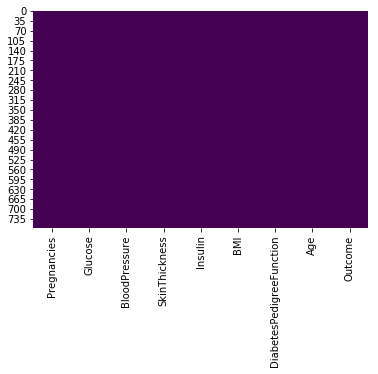

In [24]:
sns.heatmap(df_diabaties.isnull(), cmap = 'viridis', cbar = False)

In [25]:
df_diabaties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.0 KB


In [26]:
df_train = df_diabaties[df_diabaties.columns[:-1]]

In [27]:
df_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


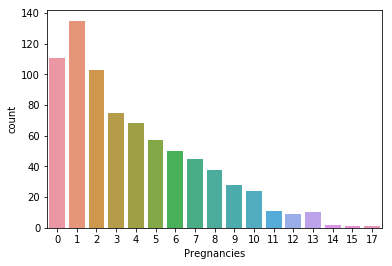

In [28]:
sns.countplot(df_train['Pregnancies'])

In [29]:
def BMI_category(bmi):
    if bmi < 15:
        return "VSUW"
    elif bmi < 16:
        return "SUW"
    elif bmi < 18.5:
        return "UW"
    elif bmi < 25:
        return "NORMAL"
    elif bmi <= 30:
        return "OW"
    else:
        return "OBESE"
        

In [30]:
df_train['BMICat'] = df_train['BMI'].apply(BMI_category)

In [31]:
df_train = pd.concat([df_train, pd.get_dummies(df_train['BMICat'])], axis = 1)
df_train = df_train.drop(columns=['BMICat'], axis = 1)

In [33]:
df_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NORMAL,OBESE,OW,UW,VSUW
0,6,148,72,35,0,33.6,0.627,50,0,1,0,0,0
1,1,85,66,29,0,26.6,0.351,31,0,0,1,0,0
2,8,183,64,0,0,23.3,0.672,32,1,0,0,0,0
3,1,89,66,23,94,28.1,0.167,21,0,0,1,0,0
4,0,137,40,35,168,43.1,2.288,33,0,1,0,0,0


In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train, df_diabaties['Outcome'], test_size = 0.1)

In [51]:
from sklearn.ensemble import GradientBoostingClassifier

ourclf = GradientBoostingClassifier()
ourclf.fit(X_train, y_train)
predictions = ourclf.predict(X_test)

In [52]:
from sklearn.metrics import classification_report,confusion_matrix

In [53]:
print(classification_report(predictions, y_test))

             precision    recall  f1-score   support

          0       0.88      0.84      0.86        55
          1       0.64      0.73      0.68        22

avg / total       0.81      0.81      0.81        77



In [54]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
predsRf = rf.predict(X_test)

In [55]:
print(classification_report(predsRf, y_test))

             precision    recall  f1-score   support

          0       0.87      0.83      0.85        54
          1       0.64      0.70      0.67        23

avg / total       0.80      0.79      0.79        77



Gradient Boosting Classifier Confusion Matrix


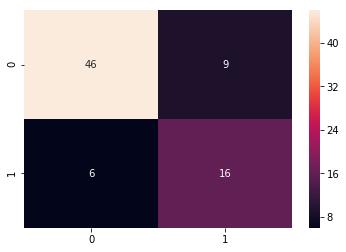

In [59]:
sns.heatmap(confusion_matrix(predictions, y_test), annot=True)
print("Gradient Boosting Classifier Confusion Matrix")


Random Forest Classifier Confusion Matrix


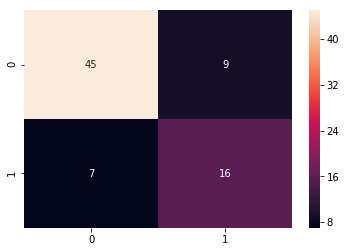

In [60]:
sns.heatmap(confusion_matrix(predsRf, y_test), annot=True)
print("Random Forest Classifier Confusion Matrix")
